# 二、文本的基本处理

> 作业2.1 编写函数avgWordLen(text)，计算一个文本的平均词长。（NLTK.Book导入的text1）

In [2]:
import nltk
nltk.find(".")
#遇到载入nltk_data的问题，解决方案参考：https://blog.csdn.net/qq_43140627/article/details/103895811

FileSystemPathPointer('C:\\Users\\28347\\AppData\\Roaming\\nltk_data')

In [3]:
from nltk.book import *
nltk.book.texts()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [29]:
def avgWordLen(text):
   words_num=len(text)
   letter_len=0
   for w in text:
       letter_len+=len(w)
   return letter_len/words_num
avgWordLen(text1)

3.830411128023649

> 作业 2.2 什么是Unicode编码和UTF-8，二者的关系，如何转换？



Unicode:规定文字符号二进制表达（编码）的符号集，码长为4字节。理论上可以编码2^31个符号。兼容ASCII，目前收录了13万个符号。

UTF-8:一种可以实现Unicode的变长码。编码规则：

1.对于单字节的符号，字节的第一位设为0，后面7位为这个符号的unicode码。因此对于英语字母，UTF-8编码和ASCII码是相同的。
2.对于n字节的符号（n>1），第一个字节的前n位都设为1，第n+1位设为0，后面字节的前两位一律设为10。剩下的没有提及的二进制位，全部用于这个符号的unicode码。

UTF-8编码	                          实际字符编码长度
0xxxxxxxx	                          7
110xxxxx 10xxxxxx	                  11
1110xxxx 10xxxxxx 10xxxxxx	          16
11110xxx 10xxxxxx 10xxxxxx 10xxxxxx	  21


二者的关系:
因为很多符号在用Unicode表示时，不需要4个字节，比如英语字母，一个字节
就够了。这样存储会造成空间的浪费，所以我们引入了变长码，根据不同字符的需要进行简化，目标是给字符分配可满足表示需求的最小长度编码。

二者的转换：
Unicode转UTF-8：
在UTF-8中，如果一个字符的字节小于0x80（128）则为ASCII字符，占一个字节，可以不用转换，因为UTF-8兼容ASCII编码。假如在Unicode中汉字“你”的编码为“u4F60”，把它转换为二进制为100111101100000，然后按照UTF-8的方法进行转换。可以将Unicode二进制从低位往高位取出二进制数字，每次取6位，如上述的二进制就可以分别取出为如下所示的格式，前面按格式填补，不足8位用0填补。
UTF-8转Unicode：
就是按照格式把它在二进制中的相应位置上取出，然后在转换就是所得到的Unicode字符了（这个运算可以通过“位移”来完成）。如上述的“你”的转换，由于其值大于0x800小于0x10000，因此可以判断为三字节存储，则最高位需要向右移“12”位再根据三字节格式的最高位为11100000（0xE0）求或（|）就可以得到最高位的值了。同理第二位则是右移“6”位，则还剩下最高位和第二位的二进制值，可以通过与111111（0x3F）求按位于（&）操作，再和11000000（0x80）求或（|）。第三位就不用移位了，只要直接取最后六位（与111111（ox3F）取&），在与11000000(0x80)求或（|）。OK了，转换成功！
参考：http://www.360doc.cn/article/7471983_321521603.html

> 作业 2.3 遍写函数lenFreq(text)，文本是其唯一输入参数，画出该文本的词长—频率分布图

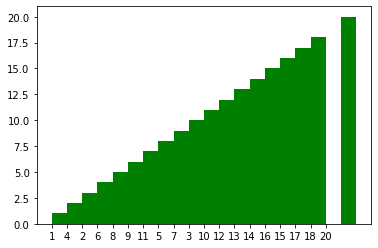

In [112]:
import numpy as np
import matplotlib.pyplot as plt
def lenFreq(text):
    dic={}
    for w in text:
        if len(w) not in dic:
            dic[len(w)]=1
        else:
            dic[len(w)]+=1
    #print(dic)
    #画图部分参考：https://stackoverrun.com/cn/q/5790101
    pos = np.arange(len(dic.keys()))
    width = 1.0     # gives histogram aspect to the bar diagram
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(dic.keys())
    plt.bar(dic.keys(), dic, width, color='g')
    plt.show()
    
lenFreq(text1)

>作业 2.4 使用正则表达式编程计算Moby Dick（NLTK.Book导入的text1）文本中，26个字母结尾词的各自次数。


In [83]:
#因为不知道要如何把正则表达式识别到的字母识别为字典的键进行统计，所以没有使用正则表达式，还在研究中
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
i=0
j=0
k=0
l=0
m=0
n=0
o=0
p=0
q=0
r=0
s=0
t=0
u=0
v=0
ww=0
x=0
y=0
z=0
for w in text1:
    if w.endswith('a'):a+=1
    if w.endswith('b'):b+=1
    if w.endswith('c'):c+=1
    if w.endswith('d'):d+=1
    if w.endswith('e'):e+=1
    if w.endswith('f'):f+=1
    if w.endswith('g'):g+=1
    if w.endswith('h'):h+=1
    if w.endswith('i'):i+=1
    if w.endswith('j'):j+=1
    if w.endswith('k'):k+=1
    if w.endswith('l'):l+=1
    if w.endswith('m'):m+=1
    if w.endswith('n'):n+=1
    if w.endswith('o'):o+=1
    if w.endswith('p'):p+=1
    if w.endswith('q'):q+=1
    if w.endswith('r'):r+=1
    if w.endswith('s'):s+=1
    if w.endswith('t'):t+=1
    if w.endswith('u'):u+=1
    if w.endswith('v'):v+=1
    if w.endswith('w'):ww+=1
    if w.endswith('x'):x+=1
    if w.endswith('y'):y+=1
    if w.endswith('z'):z+=1
print(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,ww,x,y,z)


5430 916 421 23293 42367 8072 8654 6459 70 0 2608 6487 4146 17327 8644 1959 1 11351 26833 23082 1189 9 2669 93 12208 11


> 作业2.5 文件28885.txt是一篇小说，请用re提取出书名，作者名字，语言，以及小说正文。


In [45]:
f = open('28885.txt')
txt = f.read()
pattern=re.compile("^Title: \w+|^Author: \w+|^Language: \w+|CHAPTER \w",flags=re.M)
pattern.findall(txt)

['Title: Alice',
 'Author: Lewis',
 'Language: English',
 'CHAPTER I',
 'CHAPTER I',
 'CHAPTER I',
 'CHAPTER I',
 'CHAPTER V',
 'CHAPTER V',
 'CHAPTER V',
 'CHAPTER V',
 'CHAPTER I',
 'CHAPTER X',
 'CHAPTER X',
 'CHAPTER X']

>作业 2.6 从email文件中，提取收件人和接收人的email，主题，以及文章中的日期。

From: python@python.com  
Subject: This is a letter  
To: alpha@cuc.edu.cn  
Reply To: beta@cuc.edu.cn  
body: Dear Professor XX:
I found your information on the website of the Department of Civil and Environmental Engineering, and I noticed that your research focuses on ITS and Traffic Engineering. Since I was majoring in Transportation Engineering and had good background of computer skills and programming, I take great interest on this area. I wonder if you would take any student next fall 2007, and I hope you could give me more information about your program.
Again, thank you for your attention.  



In [55]:
txt='''From: python@python.com
Subject: This is a letter
To: alpha@cuc.edu.cn
Reply To: beta@cuc.edu.cn
body: Dear Professor XX: I found your information on the website of the Department of Civil and Environmental Engineering, and I noticed that your research focuses on ITS and Traffic Engineering. Since I was majoring in Transportation Engineering and had good background of computer skills and programming, I take great interest on this area. I wonder if you would take any student next fall 2007, and I hope you could give me more information about your program. Again, thank you for your attention.'''
pattern=re.compile("^From: \w+@\w+\.\w+|^To: \w+@\w+\.\w+\.\w+|^Subject: \w+|[1-9][0-9][0-9][0-9]",flags=re.M)
pattern.findall(txt)

['From: python@python.com', 'Subject: This', 'To: alpha@cuc.edu.cn', '2007']